<a href="https://colab.research.google.com/github/ImanNoferesti/TensorFlow_DeepDive/blob/main/Malaria_Diagnosis_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

### Data Prepration

The function `tfds.load()` is used to load datasets from TensorFlow Datasets (TFDS), a collection of ready-to-use datasets for machine learning.

Parameters:

* `name`: The name of the dataset (e.g., 'mnist', 'cifar10').

* `split`: Specifies the data subset to load (e.g., 'train', 'test').

* `as_supervised`: If set to `True`, it returns the dataset in the form `(input, label)` pairs.

* `batch_size`: Allows you to load the dataset in batches.

In [9]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

In [10]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [11]:
dataset

for data in dataset[0].take(3):
  print(data)

(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(121, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [12]:
# Create a dataset containing a range of numbers from 0 to 9
dataset = tf.data.Dataset.range(10)
# Skip the first 7 elements, resulting in a dataset starting from the 7th element (index 7)
taken_after_skipping_dataset = dataset.skip(7)
taken_dataset = dataset.take(3)
# Convert the dataset to a list of numpy arrays and print it
print(list(taken_after_skipping_dataset.as_numpy_iterator()))
print(list(taken_dataset.as_numpy_iterator()))

[7, 8, 9]
[0, 1, 2]


In [13]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

In [23]:
# Example for understanding how the split function should perform

dataset = tf.data.Dataset.range(10)
dataset_size = len(dataset)

train_dataset = dataset.take(int(TRAIN_RATIO * dataset_size))
print(list(train_dataset.as_numpy_iterator()))

val_dataset = dataset.skip(int(TRAIN_RATIO * dataset_size)).take(int(VAL_RATIO * dataset_size))
print(list(val_dataset.as_numpy_iterator()))

test_dataset = dataset.skip(int((TRAIN_RATIO + VAL_RATIO) * dataset_size))
print(list(test_dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7]
[8]
[9]


In [24]:
def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):

  dataset_size = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO * dataset_size))
  val_dataset = dataset.skip(int(TRAIN_RATIO * dataset_size)).take(int(VAL_RATIO * dataset_size))
  test_dataset = dataset.skip(int((TRAIN_RATIO + VAL_RATIO) * dataset_size))

  return train_dataset, val_dataset, test_dataset


In [25]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

train_dataset, val_dataset, test_dataset = split(dataset[0],TRAIN_RATIO, VAL_RATIO, TEST_RATIO)


### Data Visualization

The `enumerate()` function in Python is a built-in function that adds a counter to an iterable and returns it as an `enumerate` object. This allows you to loop over an iterable (like a list, tuple, or dataset) and keep track of the index at the same time.

How `enumerate()` Works:

* `enumerate(iterable, start=0)` takes two parameters:
  * `iterable`: The sequence (like a list or dataset) that you want to iterate over.
  * `start`: The starting value for the counter (default is `0`).


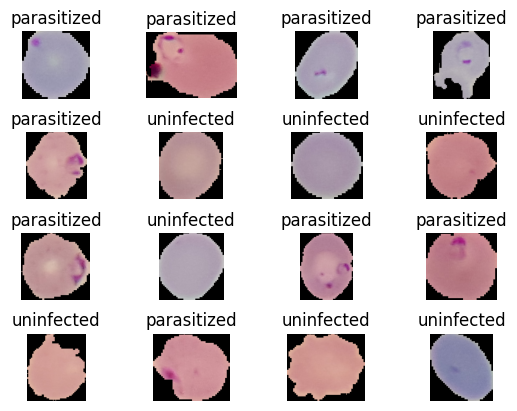

In [34]:
# Iterate over the first 16 images and labels in the training dataset
for i, (image, label) in enumerate(train_dataset.take(16)):
  # Create a subplot with 4 rows and 4 columns
  # The current subplot is determined by i+1 (1-based index)
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)